#K+Kiểm tra cấu hình máy 

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies
%cd /content/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15287, done.
remote: Total 15287 (delta 0), reused 0 (delta 0), pack-reused 15287
Receiving objects: 100% (15287/15287), 14.18 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (10483/10483), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 49.2 MB/s eta 0:00:00
     ━━━━━━

In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.13.1+cu116 CPU


#Tải data 


In [ ]:
#follow the link below to get your download code from from Roboflow
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.1 MB/s eta 0:00:00
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=roboflow-yolov5


In [ ]:
  %cd /content/yolov5
  #after following the link above, recieve python code with these fields filled in
  from roboflow import Roboflow
  rf = Roboflow(api_key="2qfrIwZkt6G31Ap3K7Fh")
  project = rf.workspace("uit-5rhkt").project("biensoxe-7geys")
  dataset = project.version(5).download("yolov5")

/content/yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to BIENSOXE-5 in yolov5pytorch:: 100%|██████████| 4274/4274 [00:02<00:00, 1884.96it/s]


Các loại biển trong tập dữ liệu 

In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- Bien_do
- Bien_ngoaigiao
- Bien_trang
- Bien_vang
- Bien_xanh
nc: 5
roboflow:
  license: CC BY 4.0
  project: biensoxe-7geys
  url: https://universe.roboflow.com/uit-5rhkt/biensoxe-7geys/dataset/5
  version: 5
  workspace: uit-5rhkt
test: ../test/images
train: BIENSOXE-5/train/images
val: BIENSOXE-5/valid/images


Sô lượng hình ảnh phân bố trong các tập dữ liêu 

In [ ]:
import os
# print('Train: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/train/images'))+len(os.listdir('/content/yolov5/BIENSOXE-5/train/labels'))))
print('Train: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/train/images'))))
print('Val: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/valid/images'))))
print('Test: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/test/images'))))

Train: 1493
Val: 414
Test: 224


#Thống kê số lượng biển  trong các tập

In [ ]:
def thong_ke(path):
    dem = 0
    do=0
    ngoaigiao=0
    trang=0
    vang=0
    xanh = 0
    for i in os.listdir(path):
        if i.endswith('.txt'):
            dem += 1
            f = open(path + '/' + i, "r")
            content = f.read()
            lst = content.split('\n')
            for i in lst:
                temp = i.split()
                if len(temp) == 0:
                    continue
                if temp[0] == '0':
                    do += 1
                elif temp[0] == '1':
                    ngoaigiao += 1
                elif temp[0] == '2':
                    trang += 1
                elif temp[0] == '3':
                    vang += 1
                else:
                    xanh += 1
            f.close()

    print('Nhãn : ', dem)
    return do, ngoaigiao, trang, vang, xanh 

In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
%cat {dataset.location}/data.yaml

names:
- Bien_do
- Bien_ngoaigiao
- Bien_trang
- Bien_vang
- Bien_xanh
nc: 5
roboflow:
  license: CC BY 4.0
  project: biensoxe-7geys
  url: https://universe.roboflow.com/uit-5rhkt/biensoxe-7geys/dataset/5
  version: 5
  workspace: uit-5rhkt
test: ../test/images
train: BIENSOXE-5/train/images
val: BIENSOXE-5/valid/images


In [ ]:
import os

In [ ]:
# print('Train: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/train/images'))+len(os.listdir('/content/yolov5/BIENSOXE-5/train/labels'))))
print('Total: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/train/images'))+len(os.listdir('/content/yolov5/BIENSOXE-5/valid/images'))+len(os.listdir('/content/yolov5/BIENSOXE-5/test/images'))))
print('Train: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/train/images'))))
print('Val: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/valid/images'))))
print('Test: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/test/images'))))

Total: 2131
Train: 1493
Val: 414
Test: 224


In [ ]:
bien_do_train, bien_ngoai_giao_train, bien_trang_train, bien_vang_train, bien_xanh_train = thong_ke('/content/yolov5/BIENSOXE-5/train/labels') 

print(f'Bien do: {bien_do_train}')
print(f'Bien ngoai giao : {bien_ngoai_giao_train}')
print(f'Bien trang: {bien_trang_train}')
print(f'Bien vang: {bien_vang_train}')
print(f'Bien xanh: {bien_xanh_train}')

Nhãn :  1493
Bien do: 83
Bien ngoai giao : 57
Bien trang: 2120
Bien vang: 194
Bien xanh: 78


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pip install Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


Tập train 

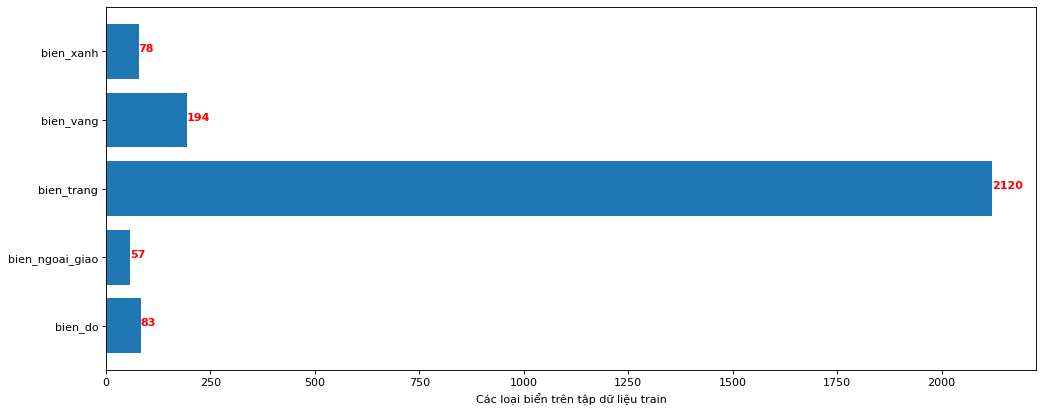

In [ ]:
from matplotlib.pyplot import figure
import numpy as np
figure(figsize=(15, 6), dpi=80)
x = np.array(['bien_do','bien_ngoai_giao','bien_trang','bien_vang', 'bien_xanh'])
y = np.array([bien_do_train,bien_ngoai_giao_train,bien_trang_train,bien_vang_train,bien_xanh_train])
plt.barh(x,y)
for i, v in enumerate(y):
    plt.text(v, i, str(v), color='red', fontweight='bold')
plt.xlabel("Các loại biển trên tập dữ liệu train")
plt.show()

Tập test 

In [ ]:
bien_do_test, bien_ngoai_giao_test, bien_trang_test, bien_vang_test, bien_xanh_test = thong_ke('/content/yolov5/BIENSOXE-5/test/labels') 

print(f'Bien do: {bien_do_test}')
print(f'Bien ngoai giao : {bien_ngoai_giao_test}')
print(f'Bien trang: {bien_trang_test}')
print(f'Bien vang: {bien_vang_test}')
print(f'Bien xanh: {bien_xanh_test}')

Nhãn :  224
Bien do: 12
Bien ngoai giao : 10
Bien trang: 307
Bien vang: 35
Bien xanh: 15


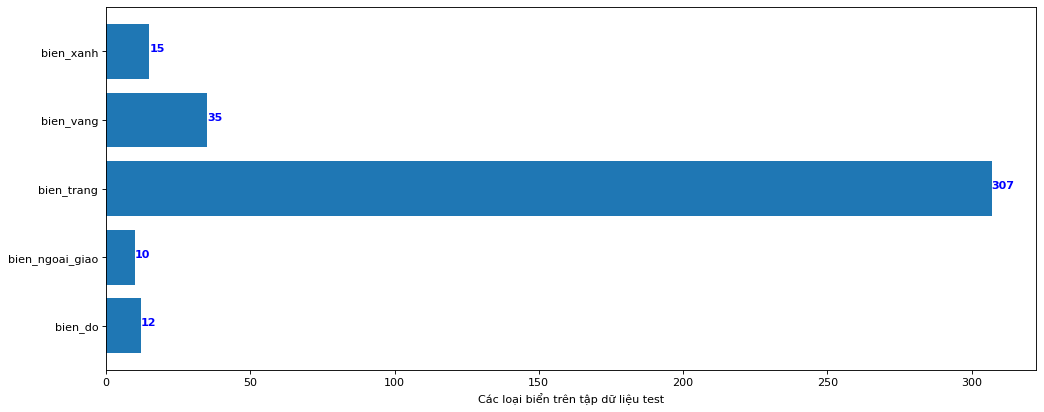

In [ ]:
figure(figsize=(15, 6), dpi=80)
x = np.array(['bien_do','bien_ngoai_giao','bien_trang','bien_vang', 'bien_xanh'])
y = np.array([bien_do_test,bien_ngoai_giao_test,bien_trang_test,bien_vang_test,bien_xanh_test])
plt.barh(x,y)
for i, v in enumerate(y):
    plt.text(v, i, str(v), color='blue', fontweight='bold')
plt.xlabel("Các loại biển trên tập dữ liệu test")
plt.show()


Tập valid 

In [ ]:
bien_do_valid, bien_ngoai_giao_valid, bien_trang_valid, bien_vang_valid, bien_xanh_valid = thong_ke('/content/yolov5/BIENSOXE-5/valid/labels') 

print(f'Bien do: {bien_do_vaid}')
print(f'Bien ngoai giao : {bien_ngoai_giao_vaid}')
print(f'Bien trang: {bien_trang_valid}')
print(f'Bien vang: {bien_vang_valid}')
print(f'Bien xanh: {bien_xanh_valid}')

Nhãn :  414
Bien do: 23
Bien ngoai giao : 15
Bien trang: 617
Bien vang: 43
Bien xanh: 26


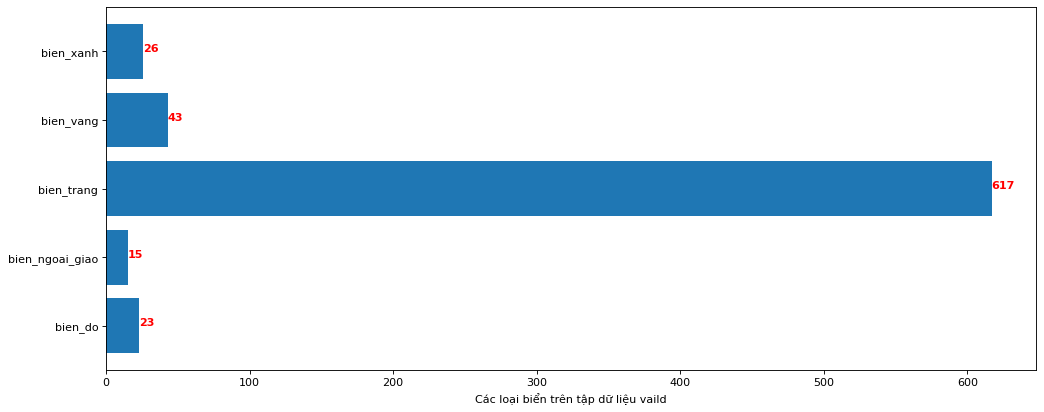

In [ ]:
figure(figsize=(15, 6), dpi=80)
x = np.array(['bien_do', 'bien_ngoai_giao', 'bien_trang', 'bien_vang', 'bien_xanh'])
y = np.array([bien_do_valid, bien_ngoai_giao_valid, bien_trang_valid, bien_vang_valid, bien_xanh_valid])
plt.barh(x, y)
for i, v in enumerate(y):
    plt.text(v, i, str(v), color='red', fontweight='bold')
plt.xlabel("Các loại biển trên tập dữ liệu vaild")
plt.show()

Trên toàn bộ dữ liệu 

In [ ]:
print(f'Biển đỏ trong toàn bộ: {bien_do_test+bien_do_train+bien_do_vaid}')
print(f'Biển ngoại giao trong toàn bộ: {bien_ngoai_giao_test+bien_ngoai_giao_train+bien_ngoai_giao_valid}')
print(f'Biển trắng trong toàn bộ: {bien_trang_test+bien_trang_train+bien_trang_valid}')
print(f'Biển vàng trong toàn bộ: {bien_vang_test+bien_vang_train+bien_vang_valid}')
print(f'Biển xanh trong toàn bộ: {bien_xanh_test+bien_xanh_train+bien_xanh_valid}')

Biển đỏ trong toàn bộ: 118
Biển ngoại giao trong toàn bộ: 82
Biển trắng trong toàn bộ: 3044
Biển vàng trong toàn bộ: 272
Biển xanh trong toàn bộ: 119


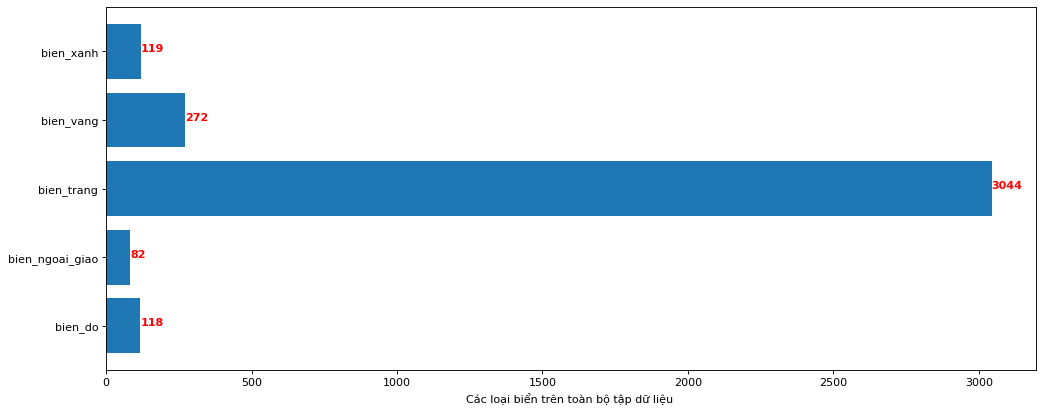

In [ ]:
from matplotlib.pyplot import figure
import numpy as np
figure(figsize=(15, 6), dpi=80)
x = np.array(['bien_do','bien_ngoai_giao','bien_trang','bien_vang', 'bien_xanh'])
y = np.array([bien_do_train+bien_do_test+bien_do_valid,bien_ngoai_giao_train+bien_ngoai_giao_valid+bien_ngoai_giao_test,bien_trang_train+bien_trang_valid+bien_trang_test,bien_vang_train+bien_vang_test+bien_vang_valid,bien_xanh_train+bien_xanh_test+bien_xanh_valid])
plt.barh(x,y)
for i, v in enumerate(y):
    plt.text(v, i, str(v), color='red', fontweight='bold')
plt.xlabel("Các loại biển trên toàn bộ tập dữ liệu ")
plt.show()